# Homework 4

In [2]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import math
from math import exp

1) If we use trapezoid rule to find the
$$\int \limits_{x=1}^{3} e^{-x} \; dx$$
using $10$ pieces. What would be our value and what is our bound on error? Verify that you actual error is within the bound your got.

In [34]:
def trapezoid(f, a, b, n):
    h = (b-a)/n
    return (h/2)*(f(a) + 2*sum(f(a+i*h) for i in range(1, n)) + f(b))

def f(x):
    return np.exp(-x)

def err_bound(a, b, n):
    return (1/12)*(((b-a)**3)/(n**2))*(f(a)) # choose highest value of f''(x), this depends whether a or b gives the highest value

guessed_val = trapezoid(f, 1, 3, 10)
guessed_err = err_bound(1, 3, 10)

print("Value =", guessed_val)
print("Error bound =", guessed_err)

actual_val = 0.318092372803578378616181354511399090814111538843344618940
actual_err = abs(actual_val - guessed_val)
print("Actual error =", actual_err)

Value = 0.31915197451352295
Error bound = 0.0024525296078096153
Actual error = 0.0010596017099445687


1.1) If we want to evaluate the integral in the previous question such that the answer is at most $10^{-6}$ from the real answer. How many pieces do we need?

In [35]:
pieces = np.sqrt(((10**6)*((3-1)**3)*f(1))/12)

pieces

495.23020988320326

$
    \frac{(b-a)^3(f''(\xi)}{12n^2} \leq \frac{1}{10^6} \\
    \frac{12n^2}{(b-a)^3(f''(\xi)} \geq 10^6 \\
    n^2 \geq \frac{(10^6)(b-a)^3(f''(\xi))}{12} \\
    n \geq \sqrt{\frac{(10^6)(b-a)^3(f''(\xi))}{12}}
$

2) Simple linear regression. Fit the data in `prob2.txt` with a straight line. Plot to verify.

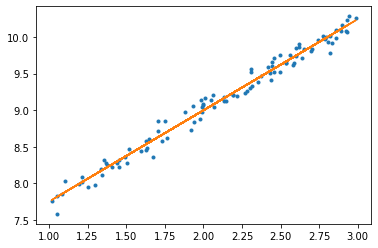

In [3]:
x, y = np.loadtxt('prob2.txt')

A = [[sum(x**2),sum(x)],[sum(x),len(x)]]
C = [[sum(y*x)],[sum(y)]]
res = np.linalg.solve(A,C)

m = res[0]
c = res[1]

line_y = m*x + c

plt.plot(x, y, '.')
plt.plot(x, line_y)

3) **[Optional]** Simpson's rule. In the class, we learn how to use trapezoid rule to numerically the integral. In this problem you will find a better rule to evaluate the integral.

You will show this in the next problem that

$$\int \limits_{x=a}^{a+nh} f(x) \; dx \approx \frac{h}{3} \left(  f(x_0) + 4 \sum^{n-1}_{i=1,3,5\ldots} f(x_i) + 2 \sum^{n-2}_{j=2,4,6\ldots} f(x_j)+ f(x_n)\right) $$

where $x_i = a+ih$.




3.1) Use Simpson's Rule described above to find

$$\int \limits_{x=1}^{3} e^{-x} \; dx$$

using n = 10. This is the same integral as the one in problem 1.

Now we will try to understand why the formula shown above works. The key idea is that instead of approximating the area under the curve using trapezoid shape. We will use parabola to approximate the shape. Let us consider a curve $f(x)$ that we want to integrate

$$\int \limits_{x=a}^{x=a+2h} f(x) \;dx$$

We will use parabola to approximate the area. This parabola will have to pass through three points.
    $$[x, f(x)], [x+h, f(x+h)], [x+2h, f(x+2h)]$$
    
Concretely, suppose that we want to calculate

$$\int \limits_{x=1}^{x=3} e^{-x} \;dx $$

with $h=1$. The parabola is shown below.

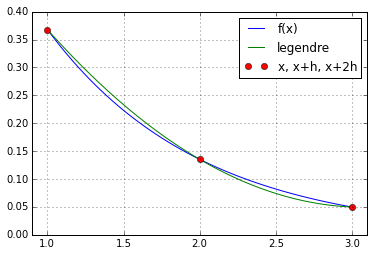

In [28]:
def f(x):
    return math.exp(-x)
#let h = 1
#we are interested in parabola that passes through
#(1, e^-1), (2, e^-2), (3, e^-3)
#We can us Legendre Polynomail for this.
def poly(x):
    #legendre polynomial that passes through (1, e^-1), (2, e^-2), (3, e^-3)
    return 0.74742 - 0.453038*x + 0.073498*x**2

x = np.linspace(1, 3,100)
ty = [f(xx) for xx in x]
py = [poly(xx) for xx in x]
plt.plot(x, ty, label='f(x)')
plt.plot(x,py, label='legendre')
plt.plot([1,2,3],[exp(-1),exp(-2),exp(-3)],'o',label=('x, x+h, x+2h'))
plt.xlim(0.9,3.1)
plt.grid()
plt.legend(loc='upper right')

3.2)From the picture above we can estimate the area of the blue curve using the area under the green parabola. This approximation is much better than trapezoid one since it capture some of the curvature of the curve.

Your job is

 1. Find the polynomial of degree two that passes through 
 
 $$[x,f(x)], [x+h, f(x+h)], [x+2h, f(x+2h)]$$
 
 2. Show that the area under the polynomial you found ealirer is
 
 $$ A = \frac{h}{3} \left[f(x)+4 f(x+h) + f(x+2h) \right] $$
 
 All you need to do is to find whatever you got in 1) analytically. Use Wolfram Alpha or Mathematica if needed.

3.3) Use what you found in 3.2. To show that if you subdivide the interval $[a,b]$ into $n$(even number) subdivision each one with with $h$ and we approximate the area of each two pieces using legendre polynomial as we have done in 3.1, we will find that

$$\int \limits_{x=a}^{a+nh} f(x) \; dx \approx \frac{h}{3} \left(  f(x_0) + 4 \sum^{n-1}_{i=1,3,5\ldots} f(x_i) + 2 \sum^{n-2}_{j=2,4,6\ldots} f(x_j)+ f(x_n)\right) $$

This formula is called Simpson's 1/3 rule. It converges with $O(1/n^4)$. Much faster than Trapezoid. Proving this convergence behavior is similar to how we get one for trapezoid but the algebra is a lot more involved.

4) Load the data in `prob4.txt`. We want to fit this data with the following function 

$$f(x) = a \exp(-x) + c$$

where $a$ and $c$ are parameters. 

Find the $a$ and $c$ that give you the "best fit".

Make a plot to verify the answer.

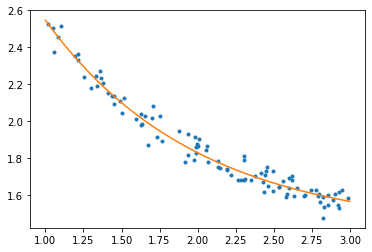

In [5]:
x, y = np.loadtxt('prob4.txt')
plt.plot(x, y, '.')

A = [[sum(np.exp(-2*x)),sum(np.exp(-x))],[sum(np.exp(-x)),len(x)]]
C = [[sum(y*np.exp(-x))],[sum(y)]]
res = np.linalg.solve(A,C)

a = res[0]
c = res[1]

x =np.linspace(1, 3, 100)
line_y = a*np.exp(-x) + c

plt.plot(x, line_y)

5) Shipyard. ship_speed_fuel.csv and ship_speed_fuel.txt contains data for fuel consumption and ship speed. You can load them up using loadtxt like shown below.

    Variable Names
    ship_leg (1-5)
    speed    (knots)
    fuel     (tons/day)
    
The plot below show clearly that there are two kinds of ship: small ship and a big ship. 

Source: S.Wang, Q. Meng (2012). "Sailing Speed Optimization for Container
Ships in a Liner Shipping Network," 

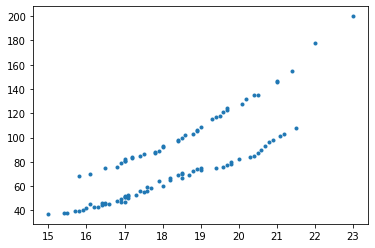

In [3]:
ship = np.loadtxt(open("ship_speed_fuel.csv","rb"), delimiter=',', skiprows=1)
#try to figure out what exactly is in the ship variable
#see ship_speed_fuel.text for the meaning of each column
shipno = ship[:, 0]
speed = ship[:, 1]
fuel = ship[:, 2]
plt.plot(speed, fuel,'.')

5.1) Physics dictates that the bigger the ship the more power it needs to maintain a fixed speed. Figure out which ship 1,2,3,4,5 is a big ship and which ship is a small ship.

Ships 4, 5 are big ships, while ships 1, 2, 3 are small ships


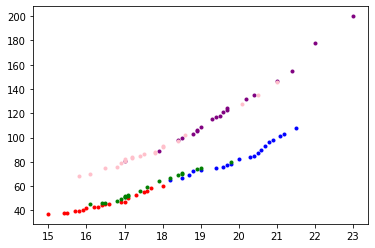

In [5]:
ship1_speed = []
ship1_fuel = []

ship2_speed = []
ship2_fuel = []

ship3_speed = []
ship3_fuel = []

ship4_speed = []
ship4_fuel = []

ship5_speed = []
ship5_fuel = []
    

for i in range(len(ship)):
    if (shipno[i] == 1):
        ship1_fuel.append(fuel[i])
        ship1_speed.append(speed[i])
    elif (shipno[i] == 2):
        ship2_fuel.append(fuel[i])
        ship2_speed.append(speed[i])
    elif (shipno[i] == 3):
        ship3_fuel.append(fuel[i])
        ship3_speed.append(speed[i])
    elif (shipno[i] == 4):
        ship4_fuel.append(fuel[i])
        ship4_speed.append(speed[i])
    elif (shipno[i] == 5):
        ship5_fuel.append(fuel[i])
        ship5_speed.append(speed[i])
        
plt.plot(ship1_speed, ship1_fuel, '.', color='red')
plt.plot(ship2_speed, ship2_fuel, '.', color='blue')
plt.plot(ship3_speed, ship3_fuel, '.', color='green')
plt.plot(ship4_speed, ship4_fuel, '.', color='purple')
plt.plot(ship5_speed, ship5_fuel, '.', color='pink')

print('Ships 4, 5 are big ships, while ships 1, 2, 3 are small ships')

5.2) The ship fuel consumption,$c$, for a given speed, $v$ can be modeled with

$$c = a v^b$$

where $a$ and $b$ are parameter you need to find for best fit.

This relation, is however not linear. It needs some manipulation to make it linear. We can take $\ln$ on both side and obtain

$$\ln c = b \ln v + \ln a$$

which is a linear relation. Your job for this one is to find $a$ and $b$ for big ship and small ship. Plot to verify. (You should have two set of parameters one for big ship and one for small ship).

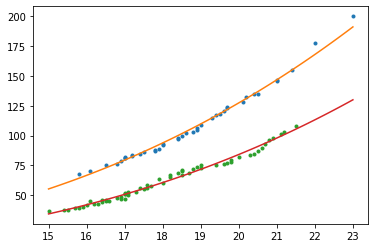

In [16]:
speed_big = ship4_speed + ship5_speed
fuel_big = ship4_fuel + ship5_fuel
A_big = [[sum(np.log(speed_big)),len(speed_big)],[sum((np.log(speed_big))**2),sum(np.log(speed_big))]]
C_big = [[sum(np.log(fuel_big))],[sum((np.log(speed_big))*(np.log(fuel_big)))]]
res_big = np.linalg.solve(A_big,C_big)

b_big = res_big[0]
ln_a_big = res_big[1]
a_big = np.exp(ln_a_big)

x_big = np.linspace(15, 23, 100)
y_big = a_big*x_big**b_big

plt.plot(speed_big, fuel_big, '.')
plt.plot(x_big, y_big)

speed_small = ship1_speed + ship2_speed + ship3_speed
fuel_small = ship1_fuel + ship2_fuel + ship3_fuel
A_small = [[sum(np.log(speed_small)),len(speed_small)],[sum((np.log(speed_small))**2),sum(np.log(speed_small))]]
C_small = [[sum(np.log(fuel_small))],[sum((np.log(speed_small))*(np.log(fuel_small)))]]
res_small = np.linalg.solve(A_small,C_small)

b_small = res_small[0]
ln_a_small = res_small[1]
a_small = np.exp(ln_a_small)

x_small = np.linspace(15, 23, 100)
y_small = a_small*x_small**b_small

plt.plot(speed_small, fuel_small, '.')
plt.plot(x_small, y_small)

5.3) (Optional, for fun only.) Suppose that he small ship can carry 1000 tons of good while big ship can carry 2000 tons of good. The cost of ship fuel(bunker) is about 250 Dollar per metric tons. Company normally charge about 0.10 Dollar per ton of good per mile travel.

The faster your ship goes the more trip you can make the more revenue you can get. Yet, at the same time the trip will cost you more cost on fuel.

Your job is to figure out what speed you need to run the ship at for maximum profit and which ship is better for you.

6) Noisy peak finding.

Finding peak in a noisy data is a very common task in analyzing physical from sensors. Consider the following data shown below.

Your task for this problem is to find the peak position and peak height from noisy data. There are 10 dataset make sure you succeed in finding **all** the peak in at least 9.

```python
def find_peaks(xs, ys):
    return [(xpeak, ypeak), (xpeak, ypeak), ...]
```

Here are some hints:
- You should first find candidates for peak in noisy data.
- Fit the peak(and neighbor) with parabola
- Make sure the parameter from the fitted parabola actually indicate that it is a peak.
- Then use the parameter from the fitted parabola to find the peak location and height. (Recall High School Math)


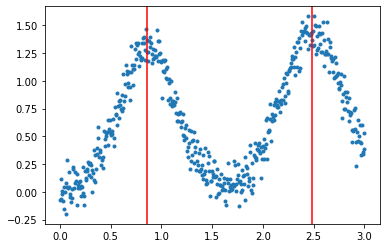

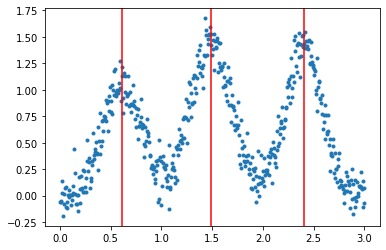

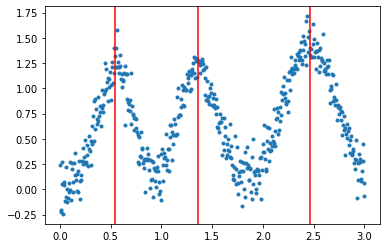

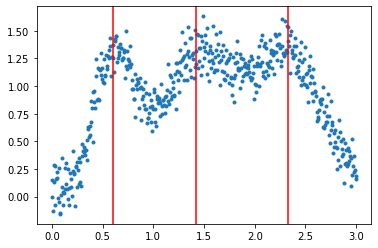

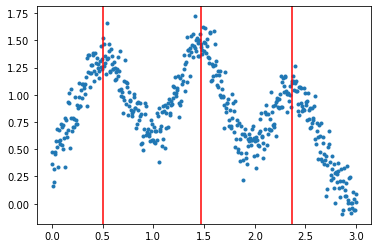

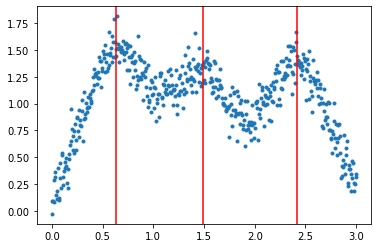

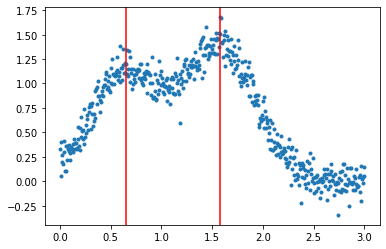

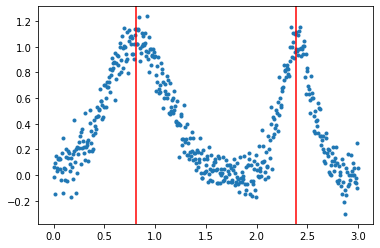

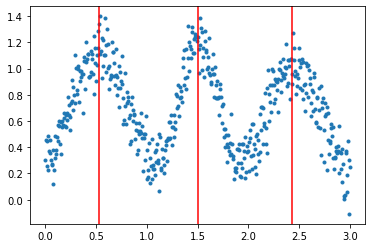

In [17]:
np.random.seed(9999)
def is_good_peak(mu, min_dist=0.8):
    if mu is None:
        return False
    smu = np.sort(mu)
    if smu[0] < 0.5:
        return False
    if smu[-1] > 2.5:
        return False
    for p, n in zip(smu, smu[1:]):
        #print(abs(p-n))
        if abs(p-n) < min_dist:
            return False
    return True

maxx = 3
ndata = 500
nset = 10
l = []
answers = []
for iset in range(1, nset):
    
    npeak = np.random.randint(2,4)
    xs = np.linspace(0,maxx,ndata)
    ys = np.zeros(ndata)
    mu = None
    
    while not is_good_peak(mu):
        mu = np.random.random(npeak)*maxx
    for ipeak in range(npeak):
        m = mu[ipeak]
        sigma = np.random.random()*0.3 + 0.2
        height = np.random.random()*0.5 + 1
        ys += height*np.exp(-(xs-m)**2/sigma**2)
        ys += np.random.randn(ndata)*0.07
    l.append(ys)
    answers.append(mu)

p6_ys = l
p6_xs = np.linspace(0,maxx,ndata)
p6_answers = answers

for ys, ans in zip(p6_ys, p6_answers):
    plt.figure()
    plt.plot(xs, ys, '.')
    for a in ans:
        plt.axvline(a,color='red')